<a href="https://colab.research.google.com/github/Laura-RC/forest_scripts/blob/main/random_forest_cleanest_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import graphviz
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from sklearn.metrics import classification_report
from scipy.spatial.distance import pdist
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from collections import OrderedDict
from matplotlib import pyplot
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
import sys
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve

In [ ]:
#props to datacamp for the tutorial
BGdata = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'broadgenus')
NGdata = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'narrowgenus')
BFdata = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'broadfam')
NFdata = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'narrowfam')
BSdata = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'broadspecies')
NSdata = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'narrowspecies')
BTdata = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'broadstrain')
NTdata = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'narrowstrain')
N1data = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'narrow1')
B1data = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'broad1')
N2data = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'narrow2')
B2data = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'broad2')
N3data = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'narrow3')
B3data = pd.read_excel('/content/drive/My Drive/focus results.xlsx', sheet_name= 'broad3')
#split into features (X) and data (Y)
BGX=BGdata.drop('classifier', axis = 1)
BGY=BGdata['classifier']
#split the data into training and test- can change the size of this
overG = SMOTE()
OGX, OGY = overG.fit_resample(BGX, BGY)
bgx_train, bgx_test, bgy_train, bgy_test = train_test_split(OGX, OGY, test_size=0.2, random_state=1, stratify=OGY)
#training the random forest- might need tweaking if parameters arent too accurate
#defaults to 100 trees in the forest
#gini critereon
#mininum of 2 samples needed to split a node and minimum of 1 sample needed for a branch to end (with only 50 samples per category it is possible that only one from a cat gets randomly added to tree, so maybe leave this)
BRF = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
BRF.fit(bgx_train, bgy_train)

#run the prediction
BGprediction = BRF.predict(bgx_test)
#checking run accuracy
BGaccuracy = f1_score(bgy_test, BGprediction, average='weighted')
print(f"Broad_genus =", BGaccuracy)

#narrow genus
NGX=NGdata.drop('classifier', axis = 1)
NGY=NGdata['classifier']
ngx_train, ngx_test, ngy_train, ngy_test = train_test_split(NGX, NGY, test_size=0.2, random_state=2, stratify=NGY)
BNG = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
BNG.fit(ngx_train, ngy_train)
NGprediction = BNG.predict(ngx_test)
NGaccuracy = f1_score(ngy_test, NGprediction, average='weighted')
print(f"Narrow_genus =", NGaccuracy)

# broad fam
BFX=BFdata.drop('classifier', axis = 1)
BFY=BFdata['classifier']
overF = SMOTE()
OFX, OFY = overF.fit_resample(BFX, BFY)
bfx_train, bfx_test, bfy_train, bfy_test = train_test_split(OFX, OFY, test_size=0.2, random_state=3, stratify=OFY)
BBF = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
BBF.fit(bfx_train, bfy_train)
BFprediction = BBF.predict(bfx_test)
BFaccuracy = f1_score(bfy_test, BFprediction, average='weighted')
print(f"Broad_family =", BFaccuracy)

# narrow fam
NFX=NFdata.drop('classifier', axis = 1)
NFY=NFdata['classifier']
nfx_train, nfx_test, nfy_train, nfy_test = train_test_split(NFX, NFY, test_size=0.2, random_state=4, stratify=NFY)
BNF = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
BNF.fit(nfx_train, nfy_train)
NFprediction = BNF.predict(nfx_test)
NFaccuracy = f1_score(nfy_test, NFprediction, average='weighted')
print(f"Narrow_family =", NFaccuracy)

# broad species
BSX=BSdata.drop('classifier', axis = 1)
BSY=BSdata['classifier']
overS = SMOTE()
OSX, OSY = overS.fit_resample(BSX, BSY)
bsx_train, bsx_test, bsy_train, bsy_test = train_test_split(OSX, OSY, test_size=0.2, random_state=5, stratify=OSY)
BBS = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
BBS.fit(bsx_train, bsy_train)
BSprediction = BBS.predict(bsx_test)
BSaccuracy = f1_score(bsy_test, BSprediction, average='weighted')
print(f"Broad_species =", BSaccuracy)

# narrow species
NSX=NSdata.drop('classifier', axis = 1)
NSY=NSdata['classifier']
nsx_train, nsx_test, nsy_train, nsy_test = train_test_split(NSX, NSY, test_size=0.2, random_state=6, stratify=NSY)
BNS = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
BNS.fit(nsx_train, nsy_train)
NSprediction = BNS.predict(nsx_test)
NSaccuracy = f1_score(nsy_test, NSprediction, average='weighted')
print(f"Narrow_species =", NSaccuracy)


#broad strain
BTX=BTdata.drop('classifier', axis = 1)
BTY=BTdata['classifier']
overT = SMOTE()
OTX, OTY = overT.fit_resample(BTX, BTY)
btx_train, btx_test, bty_train, bty_test = train_test_split(OTX, OTY, test_size=0.2, random_state=7, stratify=OTY)
broadA = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
broadA.fit(btx_train, bty_train)
predictionA = broadA.predict(btx_test)
accuracyA = f1_score(bty_test, predictionA, average='weighted')
print(f"Broad_strain =", accuracyA)

#narrow strain
NTX=NTdata.drop('classifier', axis = 1)
NTY=NTdata['classifier']
ntx_train, ntx_test, nty_train, nty_test = train_test_split(NTX, NTY, test_size=0.2, random_state=8, stratify=NTY)
narrowT = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
narrowT.fit(ntx_train, nty_train)
predictionT = narrowT.predict(ntx_test)
accuracyT = f1_score(nty_test, predictionT, average='weighted')
print(f"Narrow_strain =", accuracyT)

#broad subsystem level 1
B1X=B1data.drop('classifier', axis = 1)
B1Y=B1data['classifier']
over1 = SMOTE()
O1X, O1Y = over1.fit_resample(B1X, B1Y)
b1x_train, b1x_test, b1y_train, b1y_test = train_test_split(O1X, O1Y, test_size=0.2, random_state=9, stratify=O1Y)
broad1 = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
broad1.fit(b1x_train, b1y_train)
predictionB1 = broad1.predict(b1x_test)
accuracyB1 = f1_score(b1y_test, predictionB1, average='weighted')
print(f"Broad_subsystem 1 =", accuracyB1)

#narrow subsystem level 1
N1X=N1data.drop('classifier', axis = 1)
N1Y=N1data['classifier']
n1x_train, n1x_test, n1y_train, n1y_test = train_test_split(N1X, N1Y, test_size=0.2, random_state=10, stratify=N1Y)
narrow1= RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
narrow1.fit(n1x_train, n1y_train)
predictionN1 = narrow1.predict(n1x_test)
accuracyN1 = f1_score(n1y_test, predictionN1, average='weighted')
print(f"Narrow_subsystem 1 =", accuracyN1)

#broad subsystem level 2
B2X=B2data.drop('classifier', axis = 1)
B2Y=B2data['classifier']
over2 = SMOTE()
O2X, O2Y = over2.fit_resample(B2X, B2Y)
b2x_train, b2x_test, b2y_train, b2y_test = train_test_split(O2X, O2Y, test_size=0.2, random_state=11, stratify=O2Y)
broad2 = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
broad2.fit(b2x_train, b2y_train)
predictionB2 = broad2.predict(b2x_test)
accuracyB2 = f1_score(b2y_test, predictionB2, average='weighted')
print(f"Broad_subsytem 2 =", accuracyB2)

#narrow subsystem level 2
N2X=N2data.drop('classifier', axis = 1)
N2Y=N2data['classifier']
n2x_train, n2x_test, n2y_train, n2y_test = train_test_split(N2X, N2Y, test_size=0.2, random_state=12, stratify=N2Y)
narrow2 = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
narrow2.fit(n2x_train, n2y_train)
predictionN2 = narrow2.predict(n2x_test)
accuracyN2 = f1_score(n2y_test, predictionN2, average='weighted')
print(f"Narrow_subsytem 2 =", accuracyN2)

#broad subsystem level 3
B3X=B3data.drop('classifier', axis = 1)
B3Y=B3data['classifier']
over3 = SMOTE()
O3X, O3Y = over3.fit_resample(B3X, B3Y)
b3x_train, b3x_test, b3y_train, b3y_test = train_test_split(O3X, O3Y, test_size=0.2, random_state=13, stratify=O3Y)
broad3 = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
broad3.fit(b3x_train, b3y_train)
predictionB3 = broad3.predict(b3x_test)
accuracyB3 = f1_score(b3y_test, predictionB3, average='weighted')
print(f"Broad_subsystem 3 =", accuracyB3)

#narrow subsystem level 3
N3X=N3data.drop('classifier', axis = 1)
N3Y=N3data['classifier']
n3x_train, n3x_test, n3y_train, n3y_test = train_test_split(N3X, N3Y, test_size=0.2, random_state=14, stratify=N3Y)
narrow3 = RandomForestClassifier(n_estimators=2500, bootstrap=True, warm_start=True, max_features="log2")
narrow3.fit(n3x_train, n3y_train)
predictionN3 = narrow3.predict(n3x_test)
accuracyN3 = f1_score(n3y_test, predictionN3, average='weighted')
print(f"Narrow_subsystem3 =", accuracyN3)

Broad_genus = 0.9460687788541515
Narrow_genus = 0.8023632055493649
Broad_family = 0.9462440235552606
Narrow_family = 0.8111712273625559
Broad_species = 0.9491136765004186
Narrow_species = 0.8576340095448067
Broad_strain = 0.9572304551493086
Narrow_strain = 0.792699321888293
Broad_subsystem 1 = 0.9332460857748878
Narrow_subsystem 1 = 0.7609139212945424
Broad_subsytem 2 = 0.9293622786930213
Narrow_subsytem 2 = 0.7582948251070764
Broad_subsystem 3 = 0.9416638940373118
Narrow_subsystem3 = 0.7746386714464127


In [ ]:
#precision
print("precision")
precisionNG = precision_score(ngy_test, NGprediction, average='weighted')
print(f"Narrow_genus =", precisionNG)
precisionBG = precision_score(bgy_test, BGprediction, average='weighted')
print(f"broad_genus =", precisionBG)
precisionNF = precision_score(nfy_test, NFprediction, average='weighted')
print(f"Narrow_family =", precisionNF)
precisionBF = precision_score(bfy_test, BFprediction, average='weighted')
print(f"broad_family =", precisionBF)
precisionNS = precision_score(nsy_test, NSprediction, average='weighted')
print(f"Narrow_species =", precisionNS)
precisionBS = precision_score(bsy_test, BSprediction, average='weighted')
print(f"broad_species =", precisionBS)
precisionNT = precision_score(nty_test, predictionT, average='weighted')
print(f"Narrow_strain =", precisionNT)
precisionBT = precision_score(bty_test, predictionA, average='weighted')
print(f"broad_strain =", precisionBT)
precisionN1 = precision_score(n1y_test, predictionN1, average='weighted')
print(f"Narrow_subsystem1 =", precisionN1)
precisionB1 = precision_score(b1y_test, predictionB1, average='weighted')
print(f"broad_subsystem1 =", precisionB1)
precisionN2 = precision_score(n2y_test, predictionN2, average='weighted')
print(f"Narrow_subsystem2 =", precisionN2)
precisionB2 = precision_score(b2y_test, predictionB2, average='weighted')
print(f"broad_subsystem2 =", precisionB2)
precisionN3 = precision_score(n3y_test, predictionN3, average='weighted')
print(f"Narrow_subsystem3 =", precisionN3)
precisionB3 = precision_score(b3y_test, predictionB3, average='weighted')
print(f"broad_subsystem3 =", precisionB3)

#recall
print(" ")
print('---')
print(" ")
print("recall")
recallNG = recall_score(ngy_test, NGprediction, average='weighted')
print(f"Narrow_genus =", recallNG)
recallBG = recall_score(bgy_test, BGprediction, average='weighted')
print(f"broad_genus =", recallBG)
recallNF = recall_score(nfy_test, NFprediction, average='weighted')
print(f"Narrow_family =", recallNF)
recallBF = recall_score(bfy_test, BFprediction, average='weighted')
print(f"broad_family =", recallBF)
recallNS = recall_score(nsy_test, NSprediction, average='weighted')
print(f"Narrow_species =", recallNS)
recallBS = recall_score(bsy_test, BSprediction, average='weighted')
print(f"broad_species =", recallBS)
recallNT = recall_score(nty_test, predictionT, average='weighted')
print(f"Narrow_strain =", recallNT)
recallBT = recall_score(bty_test, predictionA, average='weighted')
print(f"broad_strain =", recallBT)
recallN1 = recall_score(n1y_test, predictionN1, average='weighted')
print(f"Narrow_subsystem1 =", recallN1)
recallB1 = recall_score(b1y_test, predictionB1, average='weighted')
print(f"broad_subsystem1 =", recallB1)
recallN2 = recall_score(n2y_test, predictionN2, average='weighted')
print(f"Narrow_subsystem2 =", recallN2)
recallB2 = recall_score(b2y_test, predictionB2, average='weighted')
print(f"broad_subsystem2 =", recallB2)
recallN3 = recall_score(n3y_test, predictionN3, average='weighted')
print(f"Narrow_subsystem3 =", recallN3)
recallB3 = recall_score(b3y_test, predictionB3, average='weighted')
print(f"broad_subsystem3 =", recallB3)

#f1
print(" ")
print("---")
print(" ")
print("f1")
f1NG = f1_score(ngy_test, NGprediction, average='weighted')
print(f"Narrow_genus =", f1NG)
f1BG = f1_score(bgy_test, BGprediction, average='weighted')
print(f"broad_genus =", f1BG)
f1NF = f1_score(nfy_test, NFprediction, average='weighted')
print(f"Narrow_family =", f1NF)
f1BF=f1_score(bfy_test, BFprediction, average='weighted')
print(f"broad_family =", f1BF)
f1NS = f1_score(nsy_test, NSprediction, average='weighted')
print(f"Narrow_species =", f1NS)
f1BS = f1_score(bsy_test, BSprediction, average='weighted')
print(f"broad_species =", f1BS)
f1NT = f1_score(nty_test, predictionT, average='weighted')
print(f"Narrow_strain =", f1NT)
f1BT = f1_score(bty_test, predictionA, average='weighted')
print(f"broad_strain =", f1BT)
f1N1 = f1_score(n1y_test, predictionN1, average='weighted')
print(f"Narrow_subsystem1 =", f1N1)
f1B1 = f1_score(b1y_test, predictionB1, average='weighted')
print(f"broad_subsystem1 =", f1B1)
f1N2 = f1_score(n2y_test, predictionN2, average='weighted')
print(f"Narrow_subsystem2 =", f1N2)
f1B2 = f1_score(b2y_test, predictionB2, average='weighted')
print(f"broad_subsystem2 =", f1B2)
f1N3 = f1_score(n3y_test, predictionN3, average='weighted')
print(f"Narrow_subsystem3 =", f1N3)
f1B3 = f1_score(b3y_test, predictionB3, average='weighted')
print(f"broad_subsystem3 =", f1B3)


precision
Narrow_genus = 0.8206281565656566
broad_genus = 0.9470656457498563
Narrow_family = 0.824303412361448
broad_family = 0.9469172272365468
Narrow_species = 0.8798370404397191
broad_species = 0.9514801386752605
Narrow_strain = 0.8242619731459018
broad_strain = 0.9585316408552443
Narrow_subsystem1 = 0.7986701294737009
broad_subsystem1 = 0.9343388341119482
Narrow_subsystem2 = 0.7721096363953508
broad_subsystem2 = 0.93185562500578
Narrow_subsystem3 = 0.7910773997827568
broad_subsystem3 = 0.9428620442339956
 
---
 
recall
Narrow_genus = 0.8035714285714286
broad_genus = 0.9465811965811965
Narrow_family = 0.8125
broad_family = 0.9465811965811965
Narrow_species = 0.8571428571428571
broad_species = 0.9487179487179487
Narrow_strain = 0.7946428571428571
broad_strain = 0.9572649572649573
Narrow_subsystem1 = 0.7633928571428571
broad_subsystem1 = 0.9337606837606838
Narrow_subsystem2 = 0.7633928571428571
broad_subsystem2 = 0.9294871794871795
Narrow_subsystem3 = 0.7767857142857143
broad_subsyste

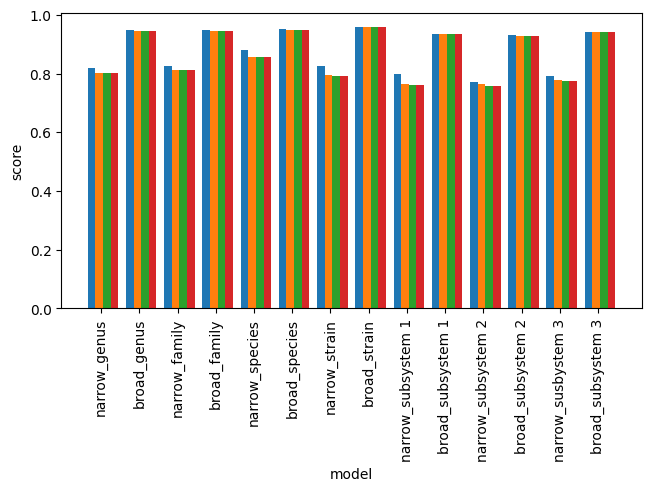

In [ ]:
Yp=[precisionNG, precisionBG, precisionNF, precisionBF, precisionNS, precisionBS, precisionNT, precisionBT, precisionN1, precisionB1, precisionN2, precisionB2, precisionN3, precisionB3]
Ya=[NGaccuracy, BGaccuracy, NFaccuracy, BFaccuracy, NSaccuracy, BSaccuracy, accuracyT, accuracyA, accuracyN1, accuracyB1, accuracyN2, accuracyB2, accuracyN3, accuracyB3]
Yr=[recallNG, recallBG, recallNF, recallBF, recallNS, recallBS, recallNT, recallBT, recallN1, recallB1, recallN2, recallB2, recallN3, recallB3]
Yf=[f1NG, f1BG, f1NF, f1BF, f1NS, f1BS, f1NT, f1BT, f1N1, f1B1, f1N2, f1B2, f1N3, f1B3]

Yy = Yf + Ya + Yp + Yr
space = [0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Xo = ('narrow_genus', 'broad_genus', 'narrow_family', 'broad_family', 'narrow_species', 'broad_species', 'narrow_strain', 'broad_strain', 'narrow_subsystem 1', 'broad_subsystem 1', 'narrow_subsystem 2', 'broad_subsystem 2', 'narrow_susbystem 3', 'broad_subsystem 3')
Yo = {'Precision': Yp, 'Recall': Yr, 'Accuracy': Ya, 'F1': Yf}
w = 0.2
m = 0
x = np.arange(len(Xo))


fig, ax = plt.subplots(layout='constrained')
for title, value in Yo.items():
  offset = w * m
  rects = ax.bar(x + offset, value, w, label=title)
  #ax.bar_label(rects, padding=3, size=10)
  m += 1

#plt.bar(Xo, Yo)

plt.xticks(x + 0.25, Xo, rotation=90, size=10)
plt.xlabel('model')
#plt.set_color_cycle(['blue', 'black', 'red', 'yellow'])
#plt.legend(loc='lower left')
plt.ylabel('score')
plt.show()

precision


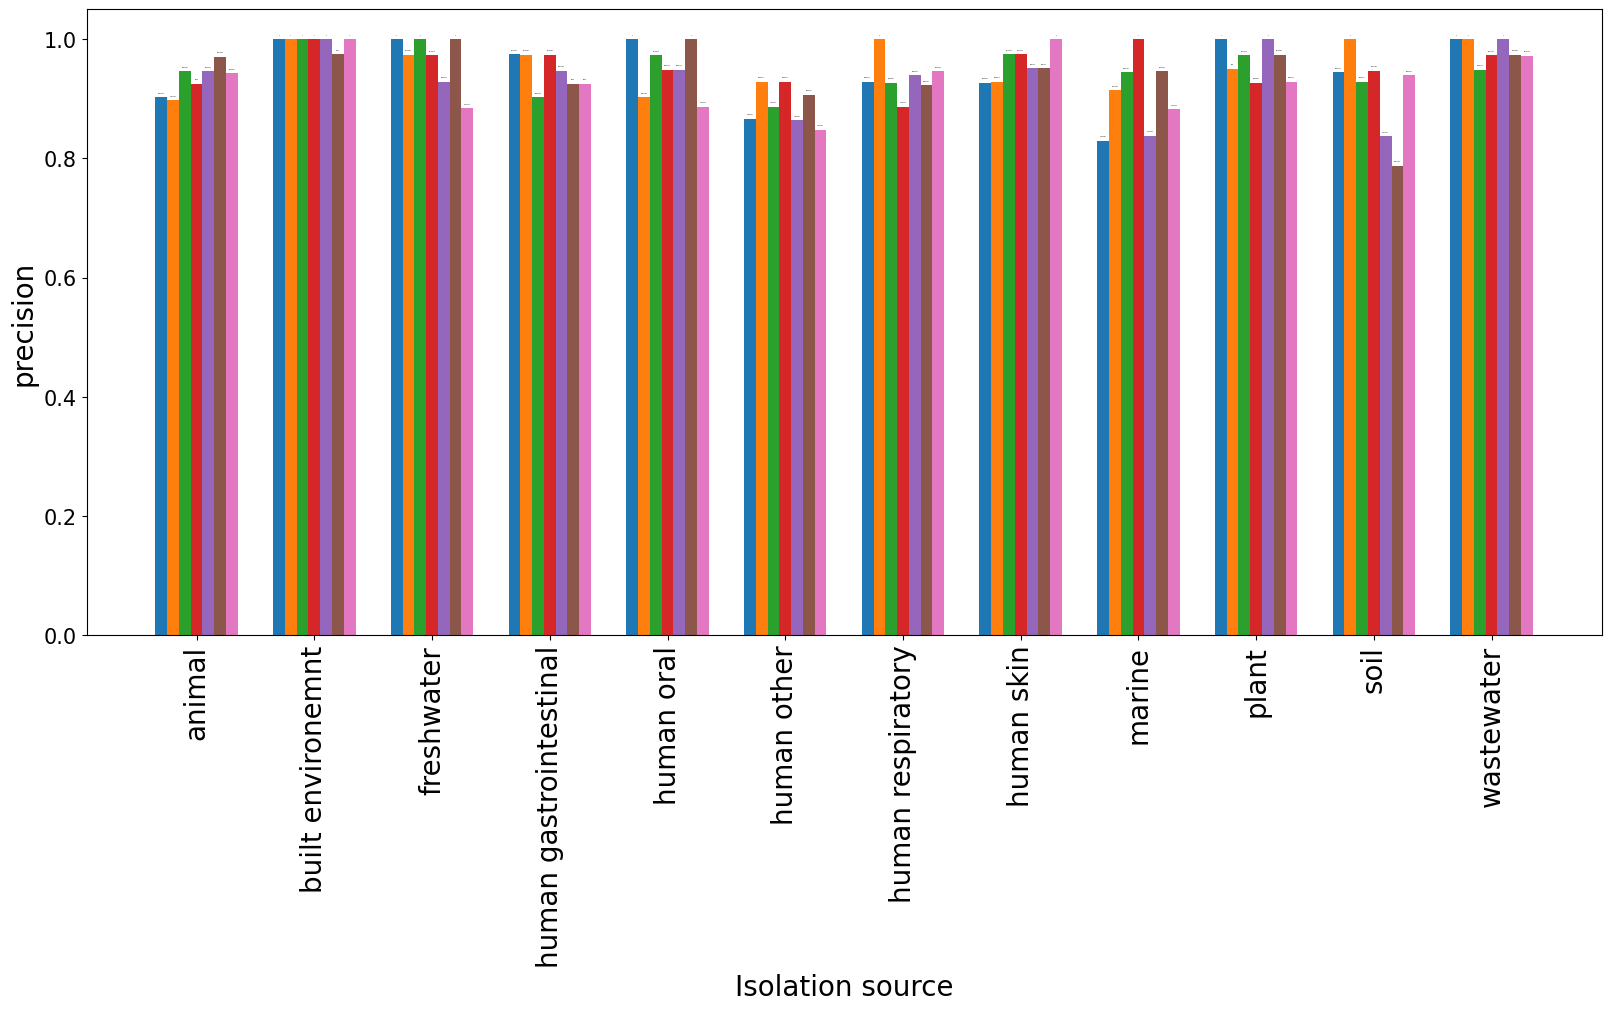

recall


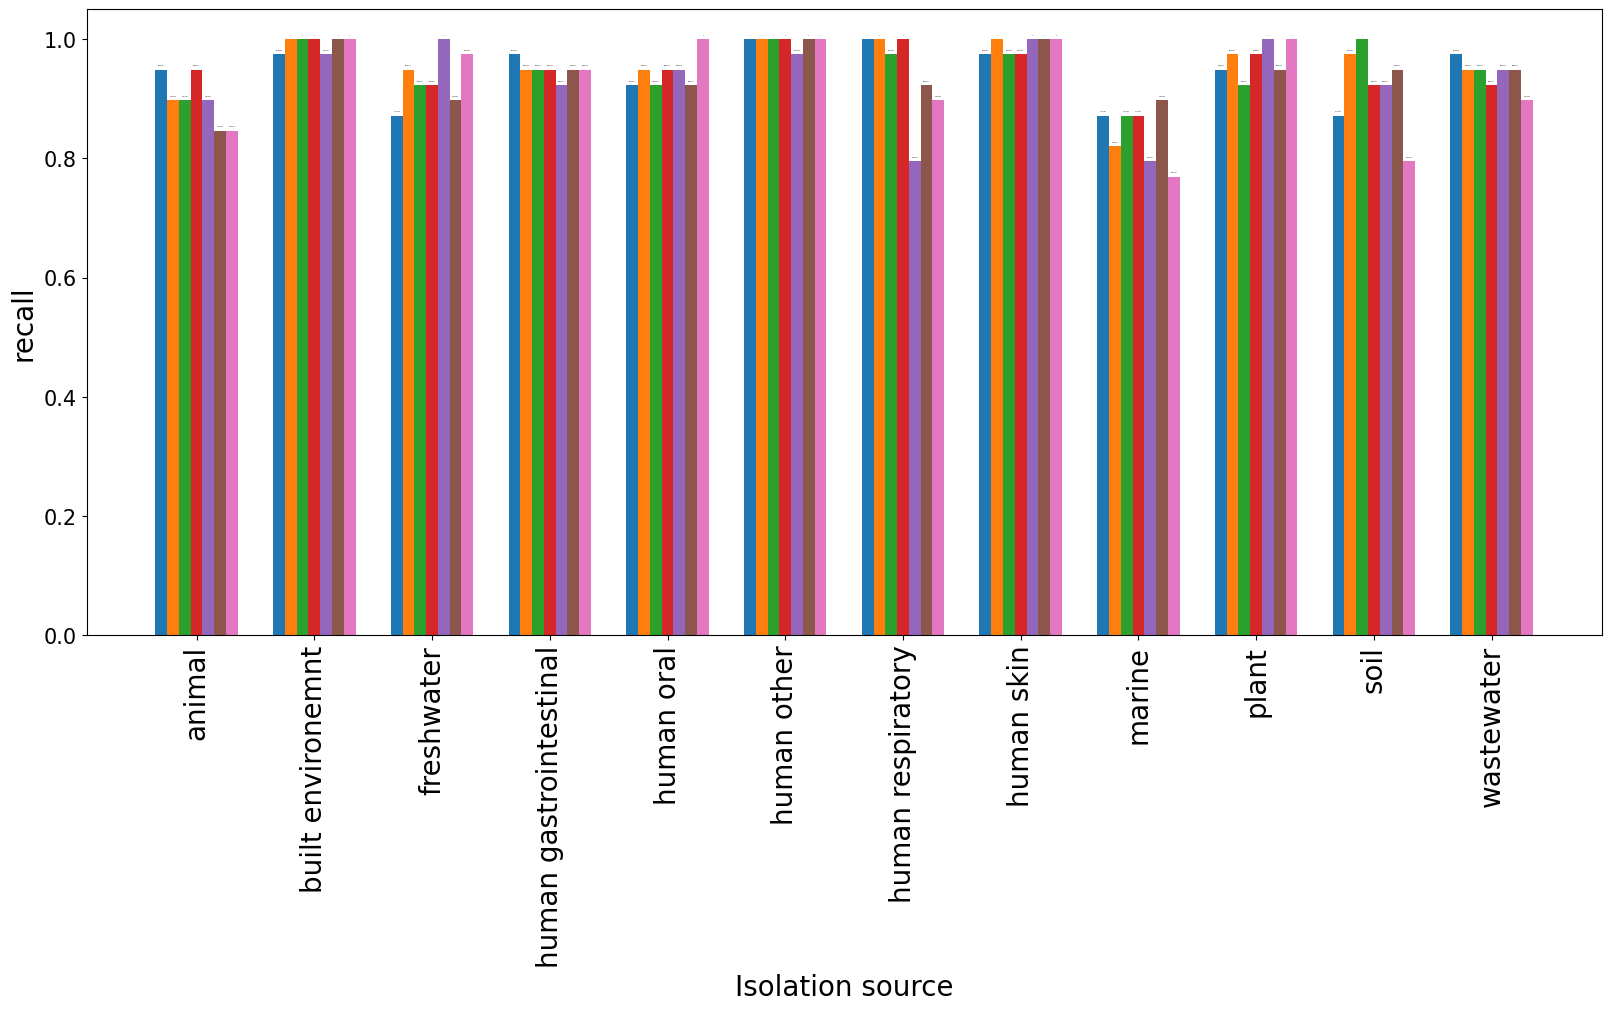

f1-score


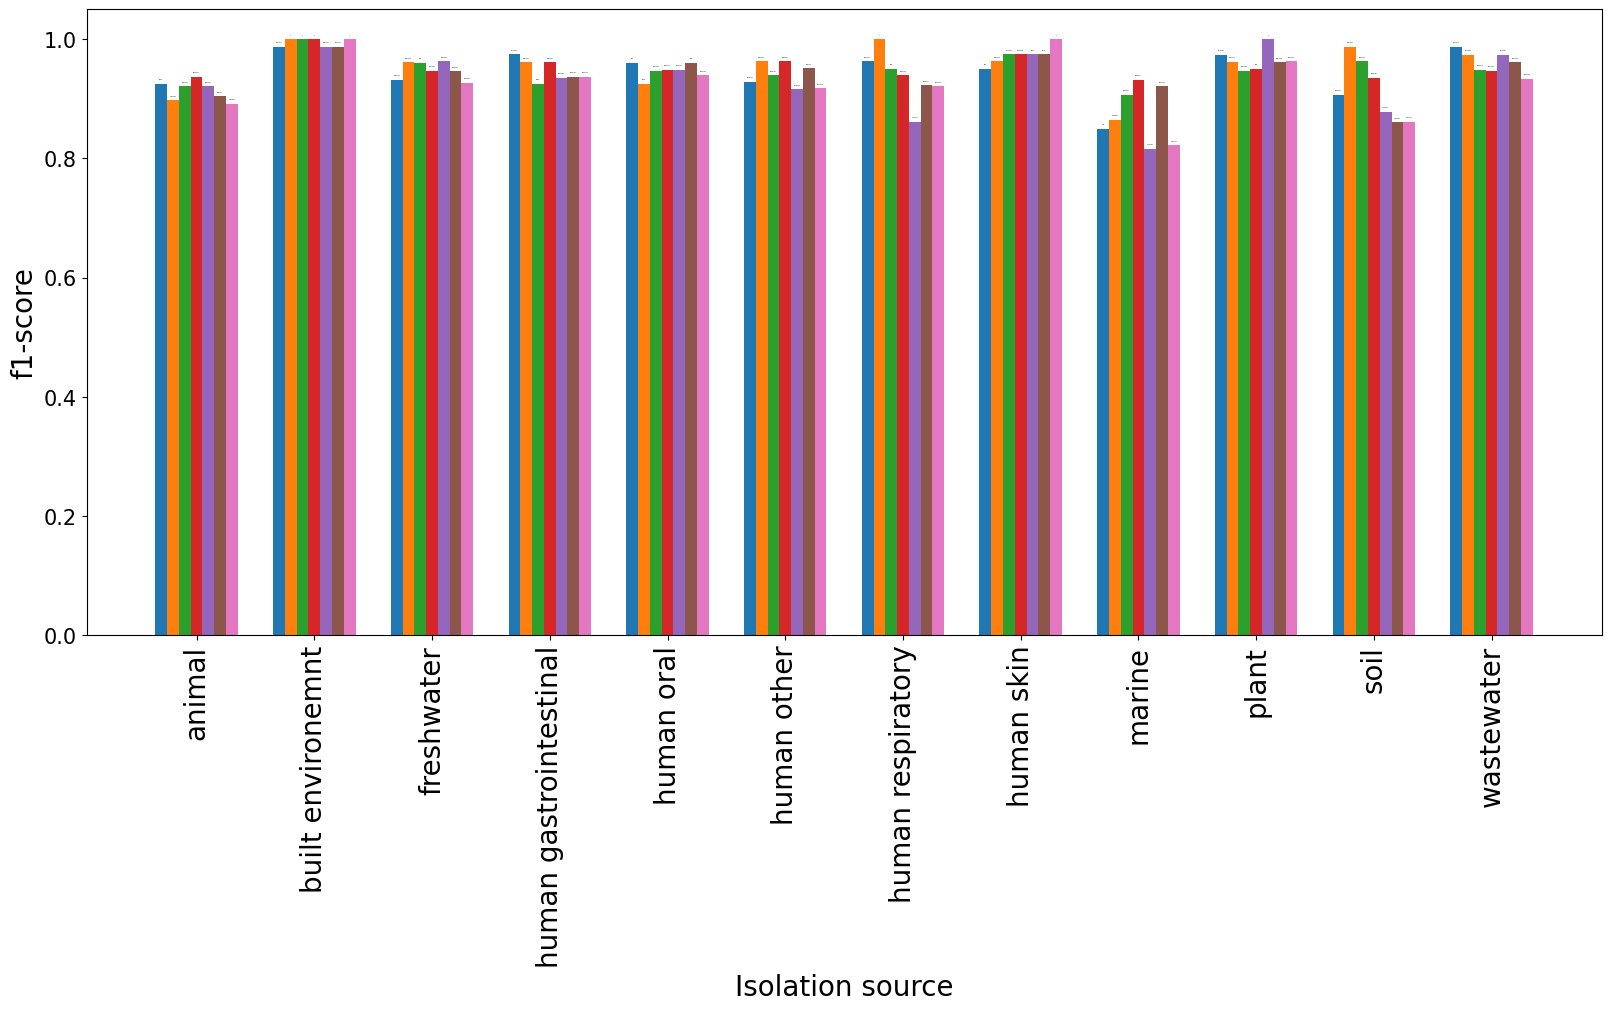

[0.9090909090909091, 1.0, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6923076923076923, 0.6666666666666666, 0.8181818181818182, 0.875, 0.6153846153846154, 0.8333333333333334, 0.7, 1.0, 0.7777777777777778, 1.0, 0.875, 1.0, 0.9, 1.0, 0.8181818181818182]
[1.0, 0.9, 0.7142857142857143, 0.8181818181818182, 0.9, 1.0, 0.8571428571428571, 1.0, 0.8888888888888888, 1.0, 0.9, 0.6666666666666666, 0.5, 0.5333333333333333, 0.75, 0.38461538461538464, 0.7142857142857143, 0.7, 0.875, 0.8888888888888888, 0.7142857142857143, 1.0, 0.9090909090909091, 0.8888888888888888]
[1.0, 1.0, 0.75, 0.8888888888888888, 1.0, 0.8888888888888888, 0.7777777777777778, 1.0, 0.8333333333333334, 0.6923076923076923, 1.0, 0.875, 0.5, 0.6153846153846154, 0.75, 0.75, 1.0, 0.8181818181818182, 0.75, 0.5454545454545454, 0.6666666666666666, 0.9, 1.0, 0.625]
[0.9090909090909091, 1.0, 0.6666666666666666, 0.6923076923076923, 1.0, 0.625, 0.7777777777777778, 0.9, 0.9, 0.7, 0.8571428571428571, 0.75, 1.0, 0.5714285714285714, 0.58823

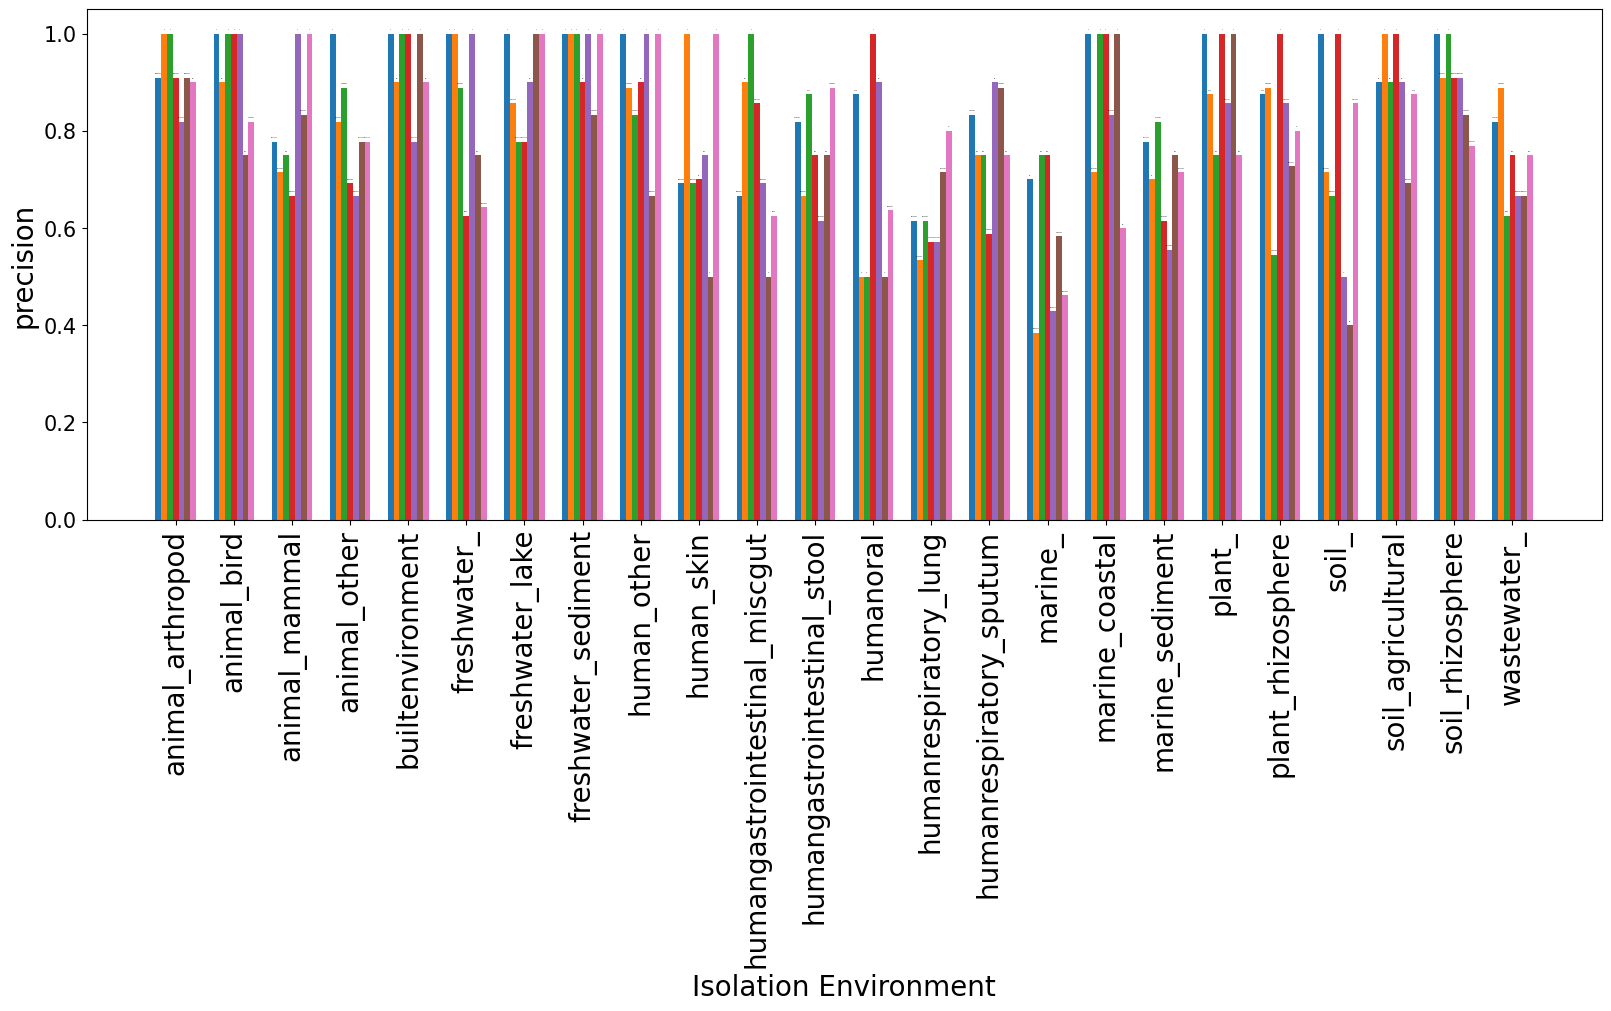

[1.0, 1.0, 0.7777777777777778, 0.7, 0.8888888888888888, 0.9, 1.0, 0.9, 0.7, 1.0, 0.8, 1.0, 0.7777777777777778, 1.0, 1.0, 0.7777777777777778, 0.7142857142857143, 0.7, 0.6666666666666666, 0.875, 0.6666666666666666, 1.0, 1.0, 0.9]
[1.0, 0.9, 0.5555555555555556, 0.9, 1.0, 0.6, 0.6, 0.8, 0.8, 0.8888888888888888, 0.9, 0.8888888888888888, 0.3333333333333333, 1.0, 0.9, 0.5555555555555556, 0.7142857142857143, 0.7, 0.7777777777777778, 1.0, 0.5555555555555556, 1.0, 1.0, 0.8]
[1.0, 1.0, 0.6666666666666666, 0.8, 0.7777777777777778, 0.8, 0.7, 1.0, 1.0, 1.0, 0.9, 0.7777777777777778, 0.3333333333333333, 1.0, 0.9, 0.6666666666666666, 0.5714285714285714, 0.9, 0.6666666666666666, 0.75, 0.6666666666666666, 1.0, 1.0, 0.5]
[1.0, 0.8, 0.6666666666666666, 0.9, 0.7777777777777778, 0.5, 0.7, 0.9, 0.9, 0.7777777777777778, 0.6, 1.0, 0.5555555555555556, 1.0, 1.0, 0.3333333333333333, 0.8571428571428571, 0.8, 0.6666666666666666, 0.75, 0.7777777777777778, 1.0, 1.0, 0.9]
[0.9, 0.9, 0.5555555555555556, 0.8, 0.777777777

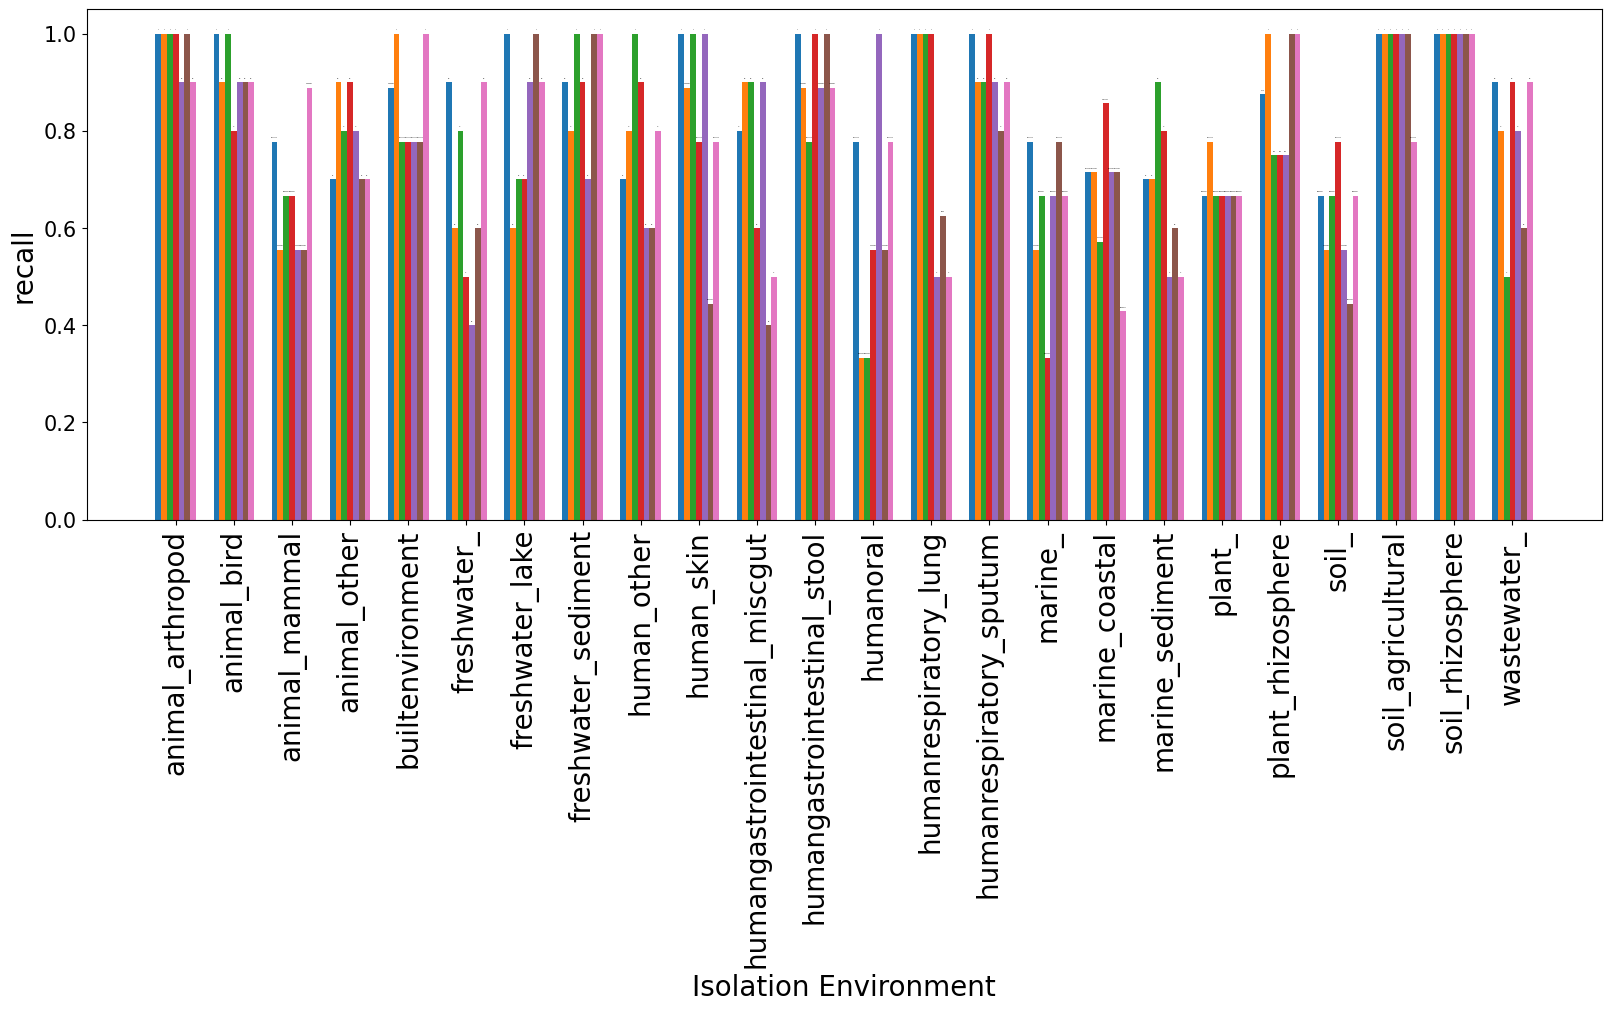

[0.9523809523809523, 1.0, 0.7777777777777778, 0.8235294117647058, 0.9411764705882353, 0.9473684210526315, 1.0, 0.9473684210526315, 0.8235294117647058, 0.8181818181818182, 0.7272727272727273, 0.9, 0.8235294117647058, 0.7619047619047619, 0.9090909090909091, 0.7368421052631579, 0.8333333333333334, 0.7368421052631579, 0.8, 0.875, 0.8, 0.9473684210526315, 1.0, 0.8571428571428571]
[1.0, 0.9, 0.625, 0.8571428571428571, 0.9473684210526315, 0.75, 0.7058823529411765, 0.8888888888888888, 0.8421052631578947, 0.9411764705882353, 0.9, 0.7619047619047619, 0.4, 0.6956521739130435, 0.8181818181818182, 0.45454545454545453, 0.7142857142857143, 0.7, 0.8235294117647058, 0.9411764705882353, 0.625, 1.0, 0.9523809523809523, 0.8421052631578947]
[1.0, 1.0, 0.7058823529411765, 0.8421052631578947, 0.875, 0.8421052631578947, 0.7368421052631579, 1.0, 0.9090909090909091, 0.8181818181818182, 0.9473684210526315, 0.8235294117647058, 0.4, 0.7619047619047619, 0.8181818181818182, 0.7058823529411765, 0.7272727272727273, 0.

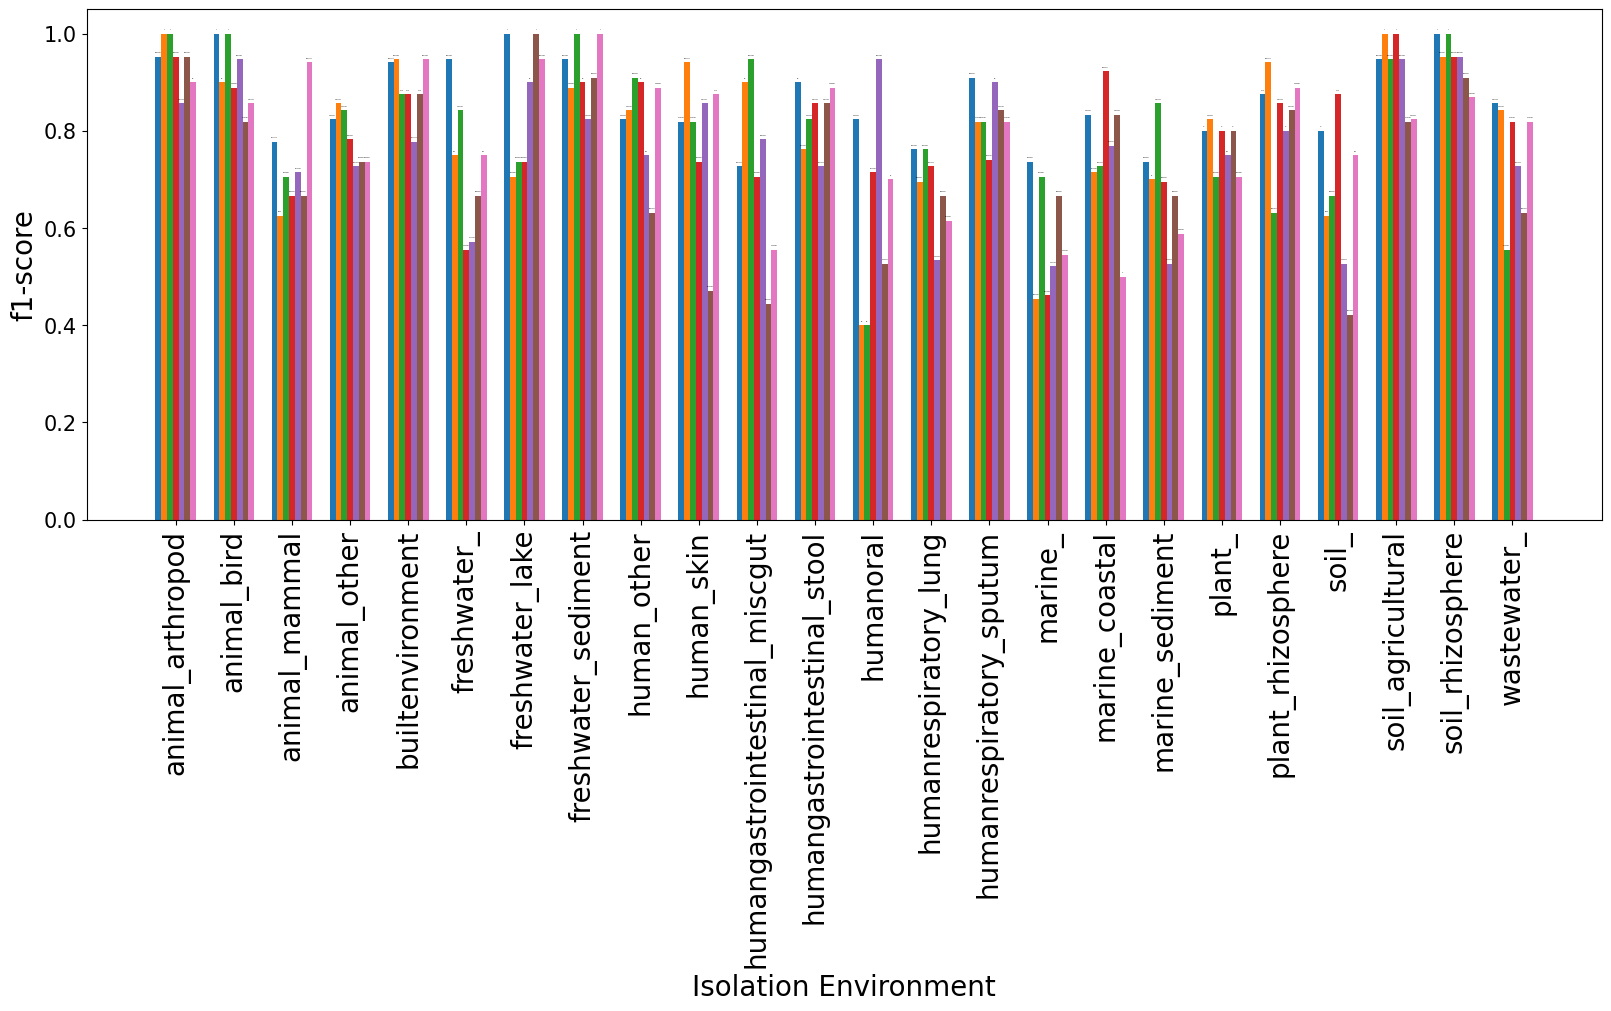

In [ ]:
#trying to make three figures, one for recall, precision and f1, with score on the y axis and model/site on the x axis

NSdict= classification_report(nsy_test, NSprediction, output_dict=True)
BSdict= classification_report(bsy_test, BSprediction, output_dict=True)

NGdict= classification_report(ngy_test, NGprediction, output_dict=True)
BGdict= classification_report(bgy_test, BGprediction, output_dict=True)

NFdict= classification_report(nfy_test, NFprediction, output_dict=True)
BFdict= classification_report(bfy_test, BFprediction, output_dict=True)

NTdict= classification_report(nty_test, predictionT, output_dict=True)
BTdict= classification_report(bty_test, predictionA, output_dict=True)

N1dict= classification_report(n1y_test, predictionN1, output_dict=True)
B1dict= classification_report(b1y_test, predictionB1, output_dict=True)

N2dict= classification_report(n2y_test, predictionN2, output_dict=True)
B2dict= classification_report(b2y_test, predictionB2, output_dict=True)

N3dict= classification_report(n3y_test, predictionN3, output_dict=True)
B3dict= classification_report(b3y_test, predictionB3, output_dict=True)

DOOP = ['BSdict', 'BGdict', 'BFdict', 'BTdict', 'B1dict', 'B2dict', 'B3dict', ]
NOOP = ['NSdict', 'NGdict', 'NFdict', 'NTdict', 'N1dict', 'N2dict', 'N3dict']
#dict looks like (A: (b: c), A: (b: c))
#dict shows A= category, b= score measurement, c= score value, DOOP= model name
xax = [] #A_DOOP
w = 0.1
o = ['animal', 'built environemnt', 'freshwater', 'human gastrointestinal', 'human oral', 'human other', 'human respiratory', 'human skin', 'marine', 'plant', 'soil', 'wastewater']
no = ['animal_arthropod', 'animal_bird', 'animal_mammal', 'animal_other', 'builtenvironment', 'freshwater_', 'freshwater_lake', 'freshwater_sediment', 'human_other', 'human_skin', 'humangastrointestinal_miscgut', 'humangastrointestinal_stool', 'humanoral', 'humanrespiratory_lung', 'humanrespiratory_sputum', 'marine_', 'marine_coastal', 'marine_sediment', 'plant_', 'plant_rhizosphere', 'soil_', 'soil_agricultural', 'soil_rhizosphere', 'wastewater_']
m = 0

BSdictp=[]
BGdictp=[]
BFdictp=[]
BTdictp=[]
B1dictp=[]
B2dictp=[]
B3dictp=[]

BSdictr=[]
BGdictr=[]
BFdictr=[]
BTdictr=[]
B1dictr=[]
B2dictr=[]
B3dictr=[]

BSdictf=[]
BGdictf=[]
BFdictf=[]
BTdictf=[]
B1dictf=[]
B2dictf=[]
B3dictf=[]

NSdictp=[]
NGdictp=[]
NFdictp=[]
NTdictp=[]
N1dictp=[]
N2dictp=[]
N3dictp=[]

NSdictr=[]
NGdictr=[]
NFdictr=[]
NTdictr=[]
N1dictr=[]
N2dictr=[]
N3dictr=[]

NSdictf=[]
NGdictf=[]
NFdictf=[]
NTdictf=[]
N1dictf=[]
N2dictf=[]
N3dictf=[]

for thing in DOOP:
  #print(thing)

  drops = ['accuracy', 'macro avg', 'weighted avg', 'support']
  thingo = getattr(sys.modules[__name__], (thing))
  x = np.arange(len(o))
  for a, d in thingo.items():
    #print(a)
    #print(d)
    if a in drops:
      pass
    else:
 #     fig, ax = plt.subplots(layout='constrained')
      for title, value in d.items():
        if title in drops:
          pass
        elif title == 'precision':
          thingo = getattr(sys.modules[__name__], (thing + f'p'))
          thingo.append(value)
        elif title == 'recall':
          thingo = getattr(sys.modules[__name__], (thing + f'r'))
          thingo.append(value)
        elif title == 'f1-score':
          thingo = getattr(sys.modules[__name__], (thing + f'f'))
          thingo.append(value)
for thing in NOOP:
  #print(thing)

  drops = ['accuracy', 'macro avg', 'weighted avg', 'support']
  thingo = getattr(sys.modules[__name__], (thing))
  x = np.arange(len(o))
  for a, d in thingo.items():
    #print(a)
    #print(d)
    if a in drops:
      pass
    else:
 #     fig, ax = plt.subplots(layout='constrained')
      for title, value in d.items():
        if title in drops:
          pass
        elif title == 'precision':
          thingo = getattr(sys.modules[__name__], (thing + f'p'))
          thingo.append(value)
        elif title == 'recall':
          thingo = getattr(sys.modules[__name__], (thing + f'r'))
          thingo.append(value)
        elif title == 'f1-score':
          thingo = getattr(sys.modules[__name__], (thing + f'f'))
          thingo.append(value)

LOOP= {'precision': 'p', 'recall': 'r', 'f1-score': 'f'}
  #Xo={'narrow_genus': , 'broad_genus', 'narrow_family', 'broad_family', 'narrow_species', 'broad_species', 'narrow_strain', 'broad_strain', 'narrow_subsystem 1', 'broad_subsystem 1', 'narrow_subsystem 2', 'broad_subsystem 2', 'narrow_susbystem 3', 'broad_subsystem 3'}
Bp={'broad_species': BSdictp, 'broad_genus': BGdictp, 'broad_family': BFdictp, 'broad_strain': BTdictp, 'broad_subsystem 1': B1dictp, 'broad_subsystem 2': B2dictp, 'broad_subsystem 3': B3dictp}
Br={'broad_species': BSdictr, 'broad_genus': BGdictr, 'broad_family': BFdictr, 'broad_strain': BTdictr, 'broad_subsystem 1': B1dictr, 'broad_subsystem 2': B2dictr, 'broad_subsystem 3': B3dictr}
Bf={'broad_species': BSdictf, 'broad_genus': BGdictf, 'broad_family': BFdictf, 'broad_strain': BTdictf, 'broad_subsystem 1': B1dictf, 'broad_subsystem 2': B2dictf, 'broad_subsystem 3': B3dictf}
Np={'narrow_species': NSdictp, 'narrow_genus': NGdictp, 'narrow_family': NFdictp, 'narrow_strain': NTdictp, 'narrow_subsystem 1': N1dictp, 'narrow_subsystem 2': N2dictp, 'narrow_subsystem 3': N3dictp}
Nr={'narrow_species': NSdictr, 'narrow_genus': NGdictr, 'narrow_family': NFdictr, 'narrow_strain': NTdictr, 'narrow_subsystem 1': N1dictr, 'narrow_subsystem 2': N2dictr, 'narrow_subsystem 3': N3dictr}
Nf={'narrow_species': NSdictf, 'narrow_genus': NGdictf, 'narrow_family': NFdictf, 'narrow_strain': NTdictf, 'narrow_subsystem 1': N1dictf, 'narrow_subsystem 2': N2dictf, 'narrow_subsystem 3': N3dictf}


x = np.arange(len(o))
xo = np.arange(len(no))

#plt.figure(figsize=(16,7))
for score, splot in LOOP.items():
  m=0
  sploto = getattr(sys.modules[__name__], (f'B' + splot))
  #plt.figure(figsize=(16,7))
  fig, ax = plt.subplots(layout='constrained', figsize=(16,10))
  #plt.figure(figsize=(16,7))
  for t, v in sploto.items():
    offset = w * m
    rects = ax.bar(x + offset, v, w, label=t)
    ax.bar_label(rects, padding=3, size=1)
    m += 1
  print(score)
  plt.xticks(x + 0.3, o, rotation=90, size=20)
  plt.yticks(size=15)
  plt.xlabel('Isolation Ennvironemnt')
  plt.xlabel('Isolation source', size=20)
#plt.set_color_cycle(['blue', 'black', 'red', 'yellow'])
#  plt.legend(loc="lower left", bbox_to_anchor=(1.05, 0.0), fontsize="small")
  plt.ylabel(score, size=20)
  plt.show()

mn = 0
wn = 0.1
for score, splot in LOOP.items():
  mn = 0
  wn = 0.1
  sploto = getattr(sys.modules[__name__], (f'N' + splot))
  fig, ax = plt.subplots(layout='constrained', figsize=(16,10))
  for t, v in sploto.items():
    if len(xo) != len(v):
      print(f"shape mismatch: xo with shape {xo.shape}, v with shape {np.array(v).shape}, skipping {t}")
      continue  # Skip to the next category
    print(v)
    offset = wn * mn
    rects = ax.bar(xo + offset, v, wn, label=t)
    ax.bar_label(rects, padding=3, size=0.1)
    mn += 1
  print(score)
  plt.xticks(xo + 0.3, no, rotation=90, size=20)
  plt.yticks(size=15)
  plt.ylabel(score, size=20)
  plt.xlabel('Isolation source', size=20)
#plt.set_color_cycle(['blue', 'black', 'red', 'yellow'])
 # plt.legend(loc="lower left", bbox_to_anchor=(1.05, 0.0), fontsize="small")
  plt.xlabel('Isolation Environment')
  plt.show()

In [ ]:
narrow_predictionF = BNF.predict(x_testF)
narrow_f13 = f1_score(N_class1, narrow_predictionF, average='weighted')
print(f"NARROW_FAMILY SRA data ", narrow_f13)

narrow_predictionG = BNG.predict(x_testG)
narrow_f1G = f1_score(N_class1, narrow_predictionG, average='weighted')
print(f"NARROW_GENUS SRA data ", narrow_f1G)

featuresN = NSX.columns
missingN = set(featuresN) - set(dataS.columns)
for col in missingN:
  dataS[col] = 0
x_testSO = dataS[featuresN]
narrow_predictionS = BNS.predict(x_testSO)
narrow_f1S = f1_score(N_class1, narrow_predictionS, average='weighted')
print(f"NARROW_SPECIES SRA data ", narrow_f1S)

narrow_predictionT = narrowT.predict(x_testT)
narrow_f1T = f1_score(N_classT, narrow_predictionT, average='weighted')
print(f"NARROW_STRAIN SRA data ", narrow_f1T)

narrow_prediction1 = narrow1.predict(x_test1)
narrow_f11 = f1_score(N_class1, narrow_prediction1, average='weighted')
print(f"NARROW_1 SRA data ", narrow_f11)

narrow_prediction2 = narrow2.predict(x_test2)
narrow_f12 = f1_score(N_class1, narrow_prediction2, average='weighted')
print(f"NARROW_2 SRA data ", narrow_f12)

narrow_prediction3 = narrow3.predict(x_test3)
narrow_f13 = f1_score(N_class1, narrow_prediction3, average='weighted')
print(f"NARROW_3 SRA data ", narrow_f13)

In [ ]:
#mgnify new data
famdata = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 'f')
gendata = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 'g')
sppdata = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 's')
strdata = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 'st')
sb1data = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 's1')
sb2data = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 's2')
sb3data = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 's3')

featuresF = BFX.columns
missingF = set(featuresF) - set(famdata.columns)
for col in missingF:
  famdata[col] = 0
x_testF = famdata[featuresF]
N_classF = famdata['narrow']
B_classF = famdata['broad']
Broad_predictionF = BBF.predict(x_testF)
Broad_f1F = f1_score(B_classF, Broad_predictionF, average='weighted')
print(f"BROAD_FAMILY mgnify2 data ", Broad_f1F)

featuresG = BGX.columns
missingG = set(featuresG) - set(gendata.columns)
for col in missingG:
  gendata[col] = 0
x_testG = gendata[featuresG]
N_classG = gendata['narrow']
B_classG = gendata['broad']
Broad_predictionG = BRF.predict(x_testG)
Broad_f1G = f1_score(B_classG, Broad_predictionG, average='weighted')
print(f"BROAD_GENUS mgnify2 data ", Broad_f1G)

featuresS = BSX.columns
missingS = set(featuresS) - set(sppdata.columns)
dataS = sppdata.reindex(columns=featuresS, fill_value=0)
x_testS = dataS[featuresS]
N_classS = sppdata['narrow']
B_classS = sppdata['broad']
Broad_predictionS = BBS.predict(x_testS)
Broad_f1S = f1_score(B_classS, Broad_predictionS, average='weighted')
print(f"BROAD_SPECIES mgnify2 data ", Broad_f1S)

featuresT = BTX.columns
missingT = set(featuresT) - set(strdata.columns)
dataT = strdata.reindex(columns=featuresT, fill_value=0)
x_testT = dataT[featuresT]
N_classT = strdata['narrow']
B_classT = strdata['broad']
Broad_predictionT = broadA.predict(x_testT)
Broad_f1T = f1_score(B_classT, Broad_predictionT, average='weighted')
print(f"BROAD_STRAIN mgnify2 data ", Broad_f1T)

features1 = B1X.columns
missing1 = set(features1) - set(sb1data.columns)
for col in missing1:
  sb1data[col] = 0
x_test1 = sb1data[features1]
N_class1 = sb1data['narrow']
B_class1 = sb1data['broad']
Broad_prediction1 = broad1.predict(x_test1)
Broad_f11 = f1_score(B_class1, Broad_prediction1, average='weighted')
print(f"BROAD_1 mgnify2 data ", Broad_f11)

features2 = B2X.columns
missing2 = set(features2) - set(sb2data.columns)
for col in missing2:
  sb2data[col] = 0
x_test2 = sb2data[features2]
N_clasS2 = sb1data['narrow']
B_class2 = sb2data['broad']
Broad_prediction2 = broad2.predict(x_test2)
Broad_f12 = f1_score(B_class2, Broad_prediction2, average='weighted')
print(f"BROAD_2 mgnify2 data ", Broad_f12)

features3 = B3X.columns
missing3 = set(features3) - set(sb3data.columns)
for col in missing3:
  sb3data[col] = 0
x_test3 = sb3data[features3]
N_class3 = sb3data['narrow']
B_class3 = sb3data['broad']
Broad_prediction3 = broad3.predict(x_test3)
Broad_f13 = f1_score(B_class3, Broad_prediction3, average='weighted')
print(f"BROAD_3 mgnify2 data ", Broad_f13)


BROAD_FAMILY mgnify2 data  0.8435848634124495
BROAD_GENUS mgnify2 data  0.8151833607006022
BROAD_SPECIES mgnify2 data  0.8369763964171761
BROAD_STRAIN mgnify2 data  0.7866647911475497
BROAD_1 mgnify2 data  0.7388816402609506
BROAD_2 mgnify2 data  0.7413748538592566
BROAD_3 mgnify2 data  0.7332294521288455


In [ ]:
#mgnify new data NARROW
famdata = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 'f')
gendata = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 'g')
sppdata = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 's')
strdata = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 'st')
sb1data = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 's1')
sb2data = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 's2')
sb3data = pd.read_excel('/content/drive/My Drive/newsetfam.xlsx', sheet_name= 's3')

featuresF = BFX.columns
missingF = set(featuresF) - set(famdata.columns)
for col in missingF:
  famdata[col] = 0
x_testF = famdata[featuresF]
N_classF = famdata['narrow']
B_classF = famdata['broad']
Broad_predictionF = BNF.predict(x_testF)
Broad_f1F = f1_score(N_classF, Broad_predictionF, average='weighted')
print(f"BROAD_FAMILY mgnify2 data ", Broad_f1F)

featuresG = BGX.columns
missingG = set(featuresG) - set(gendata.columns)
for col in missingG:
  gendata[col] = 0
x_testG = gendata[featuresG]
N_classG = gendata['narrow']
B_classG = gendata['broad']
Broad_predictionG = NRF.predict(x_testG)
Broad_f1G = f1_score(N_classG, Broad_predictionG, average='weighted')
print(f"BROAD_GENUS mgnify2 data ", Broad_f1G)

featuresS = BSX.columns
missingS = set(featuresS) - set(sppdata.columns)
dataS = sppdata.reindex(columns=featuresS, fill_value=0)
x_testS = dataS[featuresS]
N_classS = sppdata['narrow']
B_classS = sppdata['broad']
Broad_predictionS = BNS.predict(x_testS)
Broad_f1S = f1_score(N_classS, Broad_predictionS, average='weighted')
print(f"BROAD_SPECIES mgnify2 data ", Broad_f1S)

featuresT = BTX.columns
missingT = set(featuresT) - set(strdata.columns)
dataT = strdata.reindex(columns=featuresT, fill_value=0)
x_testT = dataT[featuresT]
N_classT = strdata['narrow']
B_classT = strdata['broad']
Broad_predictionT =  narrowT.predict(x_testT)
Broad_f1T = f1_score(N_classT, Broad_predictionT, average='weighted')
print(f"BROAD_STRAIN mgnify2 data ", Broad_f1T)

features1 = B1X.columns
missing1 = set(features1) - set(sb1data.columns)
for col in missing1:
  sb1data[col] = 0
x_test1 = sb1data[features1]
N_class1 = sb1data['narrow']
B_class1 = sb1data['broad']
Broad_prediction1 = narrow1.predict(x_test1)
Broad_f11 = f1_score(N_class1, Broad_prediction1, average='weighted')
print(f"BROAD_1 mgnify2 data ", Broad_f11)

features2 = B2X.columns
missing2 = set(features2) - set(sb2data.columns)
for col in missing2:
  sb2data[col] = 0
x_test2 = sb2data[features2]
N_clasS2 = sb1data['narrow']
B_class2 = sb2data['broad']
Broad_prediction2 = narrow2.predict(x_test2)
Broad_f12 = f1_score(N_clasS2, Broad_prediction2, average='weighted')
print(f"BROAD_2 mgnify2 data ", Broad_f12)

features3 = B3X.columns
missing3 = set(features3) - set(sb3data.columns)
for col in missing3:
  sb3data[col] = 0
x_test3 = sb3data[features3]
N_class3 = sb3data['narrow']
B_class3 = sb3data['broad']
Broad_prediction3 = narrow3.predict(x_test3)
Broad_f13 = f1_score(N_class3, Broad_prediction3, average='weighted')
print(f"BROAD_3 mgnify2 data ", Broad_f13)

In [ ]:
#prediction probability
Bforests = {'famdata': ['BBF'], 'gendata': ['BRF'], 'sppdata': ['BBS'], 'strdata': ['broadA'], 'sb1data': ['broad1'], 'sb2data': ['broad2'], 'sb3data': ['broad3']}
forests = {'famdata': ['BNF'], 'gendata': ['BNG'], 'sppdata': ['BNS'], 'strdata': ['narrowT'], 'sb1data': ['narrow1'], 'sb2data': ['narrow2'], 'sb3data': ['narrow3']}

for data, forest in forests.items():
  #d = getattr(sys.modules[__name__], (data))
  d = eval(data)
  title = 'sample'
  f = getattr(sys.modules[__name__], forest[0])
 # f= forest
#x = data.drop(title, axis = 1)
  ind = d[title]
  features = f.feature_names_in_
  x = d.reindex(columns=features, fill_value=0)
  cls = f.classes_

  #print(cls)
  proba = f.predict_proba(x)
  #predict = forest.predict(x)


  df = pd.DataFrame(proba, index=ind, columns=cls)
  #print(df)
  framename= data + '.csv'
  df.to_csv(framename, index=True, header=True, sep=',')



#print('---')
#print(predict)
#print('---')
#print(proba)